In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator
import pandas as pd
from  sklearn import preprocessing
from sklearn.linear_model import SGDRegressor


#Cargue el dataset
dataset = pd.read_csv("cal_housing.csv")
dataset



,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [2]:
x = dataset.loc[:, dataset.columns != 'medianHouseValue'].values #todas menos la ultima columna
y  = dataset.loc[:, dataset.columns == 'medianHouseValue'].values


In [3]:
#Genere un conjunto de entrenamiento con 80% de los datos y 20% para pruebas,
from sklearn.model_selection import train_test_split
x_train , x_Test ,y_train , y_test = train_test_split(x,y,test_size= 0.2, random_state= 0,shuffle = True) #Mezcle los datos (set random_state=0)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, x_Test, y_test, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))


KeyboardInterrupt: 

In [4]:
class validation_set:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

In [5]:
import csv
def create_csv(name_file, data,  list_opt = False):
    new_data = data.tolist()

    with open(name_file, 'w', newline='') as f:
        if list_opt:
            new_new_data = [[i] for i in new_data]
        else:
            new_new_data = new_data
        write = csv.writer(f)
        write.writerows(new_new_data)

In [18]:
from sklearn.model_selection import KFold
validation_sets = []
kf = KFold(n_splits = 10)
c = 0

for train_index, test_index in kf.split(x_train):
    c = c + 1
    X_train_v, X_test_v = x_train[train_index], x_train[test_index]
    y_train_v, y_test_v = y_train[train_index], y_train[test_index]
    validation_sets.append(validation_set(X_train_v, y_train_v, X_test_v, y_test_v))
    create_csv(name_file = "./data_validation_train_" + str(10) + "_" + str(c) + ".csv", 
                    data = X_train_v)
    create_csv(name_file = "./target_validation_train_" + str(10) + "_" + str(c) + ".csv", 
                    data = y_train_v)

Leemos el archivo

In [6]:
names = ["longitude","latitude","housingMedianAge","totalRooms","totalBedrooms","population","households","medianIncome"]
names_y = ["medianHouseValue"]

dataset_validation_x = pd.read_csv("data_validation_train_10_1.csv" ,  header=None)
dataset_validation_y = pd.read_csv("target_validation_train_10_1.csv" ,  header=None)


In [7]:
yy  = dataset_validation_y.values
xx = dataset_validation_x.values

Utilice regresión lineal mediante gradiente descendiente estocástico para generar una línea que sea justo lo mejor posible a los datos(modificando parámetros max_iter,learning_rate y eta0) y reporte el error cuadrado medio (MSE) y el coeficiente de determinación (r2)

/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


((0, 294972.7665147612), (1, 392202.25987030275), (2, 275079.29412851227), (3, 68553.34036585988), (4, 214872.5043534284), (5, 226617.48650468024), (6, 356491.69502275967), (7, 355029.5739764598))
   x      Predicted
0  0  294972.766515
1  1  392202.259870
2  2  275079.294129
3  3   68553.340366
4  4  214872.504353
5  5  226617.486505
6  6  356491.695023
7  7  355029.573976
Regresión polinomial estocástico grado 3 escalado robusto
mse: 6470195621.483195 r2: 0.5145417755587678


/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


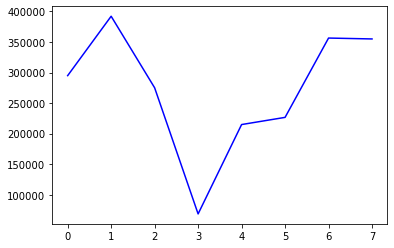

In [15]:
mse_list = []
r2_list = []


polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(xx)
x_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)
regr = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.00001 , max_iter= 1000)
regr.fit(x_poly_robust_scaler, yy)
y_poly_pred = regr.predict(x_poly_robust_scaler)
mse = mean_squared_error(yy, y_poly_pred)
r2 = r2_score(yy, y_poly_pred)

mse_list.append(mse)
r2_list.append(r2)

# ~ #Ajustes para que la curva trazada se vea correctamente
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(dataset_validation_x,y_poly_pred), key=sort_axis)
print (tuple(sorted_zip))
x_sorted, y_poly_pred = zip(*sorted_zip)
print(pd.DataFrame({'x': np.reshape(x_sorted,(1,-1))[0], 'Predicted': y_poly_pred}))
plt.plot(x_sorted, y_poly_pred, color='b')
print ('Regresión polinomial estocástico grado 3 escalado robusto\nmse: {} r2: {}'.format(mse, r2))


Utilice regresión polinomial mediante gradiente descendiente estocástico con polinomios de grado 2 y 3 para generar una línea curva que sea justo lo mejor posible a los datos(modificando parámetros max_iter,learning_rate y eta0) y reporte MSE y r2

/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


((0, 236388.9894287563), (1, 287952.73123039573), (2, 186387.77285871963), (3, -48859.07258702924), (4, 90766.33504170351), (5, 142678.05149216263), (6, 303241.80367139156), (7, 409544.7748350272))
   x      Predicted
0  0  236388.989429
1  1  287952.731230
2  2  186387.772859
3  3  -48859.072587
4  4   90766.335042
5  5  142678.051492
6  6  303241.803671
7  7  409544.774835
Regresión polinomial estocástico grado 3 escalado robusto
mse: 20581066579.748657 r2: -0.544195666316071


/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


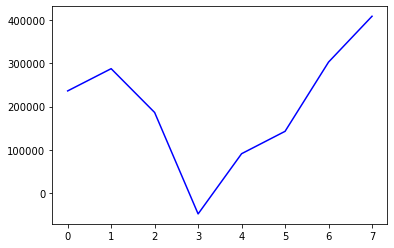

In [12]:
mse_list = []
r2_list = []


polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(xx)
x_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)
regr = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.000001 , max_iter= 1000)
regr.fit(x_poly_robust_scaler, yy)
y_poly_pred = regr.predict(x_poly_robust_scaler)
mse = mean_squared_error(yy, y_poly_pred)
r2 = r2_score(yy, y_poly_pred)

mse_list.append(mse)
r2_list.append(r2)

# ~ #Ajustes para que la curva trazada se vea correctamente
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(dataset_validation_x,y_poly_pred), key=sort_axis)
print (tuple(sorted_zip))
x_sorted, y_poly_pred = zip(*sorted_zip)
print(pd.DataFrame({'x': np.reshape(x_sorted,(1,-1))[0], 'Predicted': y_poly_pred}))
plt.plot(x_sorted, y_poly_pred, color='b')
print ('Regresión polinomial estocástico grado 3 escalado robusto\nmse: {} r2: {}'.format(mse, r2))


/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


((0, 128247.66438736275), (1, 164843.6177727348), (2, 82335.88636017154), (3, -45028.995387146526), (4, 46825.20799235504), (5, 64323.718393714655), (6, 194162.7011905061), (7, 432031.27876050875))
   x      Predicted
0  0  128247.664387
1  1  164843.617773
2  2   82335.886360
3  3  -45028.995387
4  4   46825.207992
5  5   64323.718394
6  6  194162.701191
7  7  432031.278761
Regresión polinomial estocástico grado 3 escalado robusto
mse: 35095357005.53236 r2: -1.6332016363566062


/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


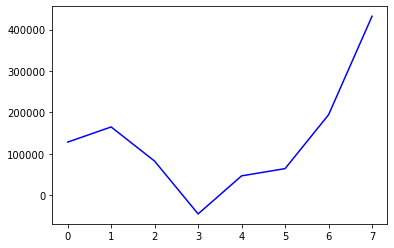

In [10]:
mse_list = []
r2_list = []


polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(xx)
x_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)
regr = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.0000001 , max_iter= 1000)
regr.fit(x_poly_robust_scaler, yy)
y_poly_pred = regr.predict(x_poly_robust_scaler)
mse = mean_squared_error(yy, y_poly_pred)
r2 = r2_score(yy, y_poly_pred)

mse_list.append(mse)
r2_list.append(r2)

# ~ #Ajustes para que la curva trazada se vea correctamente
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(dataset_validation_x,y_poly_pred), key=sort_axis)
print (tuple(sorted_zip))
x_sorted, y_poly_pred = zip(*sorted_zip)
print(pd.DataFrame({'x': np.reshape(x_sorted,(1,-1))[0], 'Predicted': y_poly_pred}))
plt.plot(x_sorted, y_poly_pred, color='b')
print ('Regresión polinomial estocástico grado 3 escalado robusto\nmse: {} r2: {}'.format(mse, r2))


Almacene los valores MSE y r2 de cada pliegue y al terminar los 10 pliegues reporte el resultado promedio estos

In [4]:
dataset_validation_x = pd.read_csv("data_validation_train_10_1.csv" ,  header=None)
dataset_validation_y = pd.read_csv("target_validation_train_10_1.csv" ,  header=None)

dataset_validation_x1 = pd.read_csv("data_validation_train_10_2.csv" ,  header=None)
dataset_validation_y1 = pd.read_csv("target_validation_train_10_2.csv" ,  header=None)

dataset_validation_x2 = pd.read_csv("data_validation_train_10_3.csv" ,  header=None)
dataset_validation_y2 = pd.read_csv("target_validation_train_10_3.csv" ,  header=None)

dataset_validation_x3 = pd.read_csv("data_validation_train_10_4.csv" ,  header=None)
dataset_validation_y3 = pd.read_csv("target_validation_train_10_4.csv" ,  header=None)

dataset_validation_x4 = pd.read_csv("data_validation_train_10_5.csv" ,  header=None)
dataset_validation_y4 = pd.read_csv("target_validation_train_10_5.csv" ,  header=None)

dataset_validation_x5 = pd.read_csv("data_validation_train_10_6.csv" ,  header=None)
dataset_validation_y5 = pd.read_csv("target_validation_train_10_6.csv" ,  header=None)

"""dataset_validation_x6 = pd.read_csv("data_validation_train_10_7.csv" ,  header=None)
dataset_validation_y6 = pd.read_csv("target_validation_train_10_7.csv" ,  header=None)

dataset_validation_x7 = pd.read_csv("data_validation_train_10_8.csv" ,  header=None)
dataset_validation_y7 = pd.read_csv("target_validation_train_10_8.csv" ,  header=None)

dataset_validation_x8 = pd.read_csv("data_validation_train_10_9.csv" ,  header=None)
dataset_validation_y8 = pd.read_csv("target_validation_train_10_9.csv" ,  header=None)

dataset_validation_x9 = pd.read_csv("data_validation_train_10_10.csv" ,  header=None)
dataset_validation_y9 = pd.read_csv("target_validation_train_10_10.csv" ,  header=None)"""

'dataset_validation_x6 = pd.read_csv("data_validation_train_10_7.csv" ,  header=None)\ndataset_validation_y6 = pd.read_csv("target_validation_train_10_7.csv" ,  header=None)\n\ndataset_validation_x7 = pd.read_csv("data_validation_train_10_8.csv" ,  header=None)\ndataset_validation_y7 = pd.read_csv("target_validation_train_10_8.csv" ,  header=None)\n\ndataset_validation_x8 = pd.read_csv("data_validation_train_10_9.csv" ,  header=None)\ndataset_validation_y8 = pd.read_csv("target_validation_train_10_9.csv" ,  header=None)\n\ndataset_validation_x9 = pd.read_csv("data_validation_train_10_10.csv" ,  header=None)\ndataset_validation_y9 = pd.read_csv("target_validation_train_10_10.csv" ,  header=None)'

In [5]:
yy  = dataset_validation_y.values
xx = dataset_validation_x.values

yy1  = dataset_validation_y1.values
xx1 = dataset_validation_x1.values

yy2  = dataset_validation_y2.values
xx2 = dataset_validation_x2.values

yy3  = dataset_validation_y3.values
xx3 = dataset_validation_x3.values

yy4  = dataset_validation_x4.values
xx4 = dataset_validation_y4.values

yy5  = dataset_validation_y5.values
xx5 = dataset_validation_x5.values

"""yy6  = dataset_validation_y6.values
xx6 = dataset_validation_x6.values

yy7  = dataset_validation_y7.values
xx7 = dataset_validation_x7.values

yy8  = dataset_validation_y8.values
xx8 = dataset_validation_x8.values

yy9  = dataset_validation_y9.values
xx9 = dataset_validation_x9.values"""

'yy6  = dataset_validation_y6.values\nxx6 = dataset_validation_x6.values\n\nyy7  = dataset_validation_y7.values\nxx7 = dataset_validation_x7.values\n\nyy8  = dataset_validation_y8.values\nxx8 = dataset_validation_x8.values\n\nyy9  = dataset_validation_y9.values\nxx9 = dataset_validation_x9.values'

In [7]:
mse_list = []
r2_list = []

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(xx)
x_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)
regr = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.0000001 , max_iter= 1000)
regr.fit(x_poly_robust_scaler, yy)
y_poly_pred = regr.predict(x_poly_robust_scaler)
mse = mean_squared_error(yy, y_poly_pred)
r2 = r2_score(yy, y_poly_pred)

mse_list.append(mse)
r2_list.append(r2)


"""polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(xx6)
x_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)
regr = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.0000001 , max_iter= 1000)
regr.fit(x_poly_robust_scaler, yy6)
y_poly_pred = regr.predict(x_poly_robust_scaler)
mse = mean_squared_error(yy6, y_poly_pred)
r2 = r2_score(yy6, y_poly_pred)

mse_list.append(mse)
r2_list.append(r2)

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(xx7)
x_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)
regr = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.0000001 , max_iter= 1000)
regr.fit(x_poly_robust_scaler, yy7)
y_poly_pred = regr.predict(x_poly_robust_scaler)
mse = mean_squared_error(yy7, y_poly_pred)
r2 = r2_score(yy7, y_poly_pred)

mse_list.append(mse)
r2_list.append(r2)

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(xx8)
x_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)
regr = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.0000001 , max_iter= 1000)
regr.fit(x_poly_robust_scaler, yy8)
y_poly_pred = regr.predict(x_poly_robust_scaler)
mse = mean_squared_error(yy8, y_poly_pred)
r2 = r2_score(yy8, y_poly_pred)

mse_list.append(mse)
r2_list.append(r2)

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(xx9)
x_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)
regr = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.0000001 , max_iter= 1000)
regr.fit(x_poly_robust_scaler, yy9)
y_poly_pred = regr.predict(x_poly_robust_scaler)
mse = mean_squared_error(yy9, y_poly_pred)
r2 = r2_score(yy9, y_poly_pred)

mse_list.append(mse)
r2_list.append(r2)
"""


/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/adolfohuerta/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


"polynomial_features= PolynomialFeatures(degree=3)\nx_poly = polynomial_features.fit_transform(xx6)\nx_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)\nregr = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.0000001 , max_iter= 1000)\nregr.fit(x_poly_robust_scaler, yy6)\ny_poly_pred = regr.predict(x_poly_robust_scaler)\nmse = mean_squared_error(yy6, y_poly_pred)\nr2 = r2_score(yy6, y_poly_pred)\n\nmse_list.append(mse)\nr2_list.append(r2)\n\npolynomial_features= PolynomialFeatures(degree=3)\nx_poly = polynomial_features.fit_transform(xx7)\nx_poly_robust_scaler = preprocessing.RobustScaler().fit_transform(x_poly)\nregr = SGDRegressor(learning_rate = 'invscaling', eta0 = 0.0000001 , max_iter= 1000)\nregr.fit(x_poly_robust_scaler, yy7)\ny_poly_pred = regr.predict(x_poly_robust_scaler)\nmse = mean_squared_error(yy7, y_poly_pred)\nr2 = r2_score(yy7, y_poly_pred)\n\nmse_list.append(mse)\nr2_list.append(r2)\n\npolynomial_features= PolynomialFeatures(degree=3)\nx_poly

In [8]:
mse_list

[35095510164.307526]

In [9]:
r2_list

[-1.6332131278464161]